In [738]:
from skimage import io
from matplotlib.pyplot import imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, entropy
from skimage.feature import graycomatrix, graycoprops
import matplotlib.ticker as ticker

In [739]:
# Define the input
class_input = 'B'
absen_input = 12
type_input = 'Happy'
image_index_input = 1

In [740]:
def get_images(absen, clas):
    all_class = ['a', 'b', 'c', 'd']
    start = 300 * (all_class.index(clas)) + (10 * (absen - 1)) + 1
    end = start + 9
    return list(range(start, end + 1))

In [741]:
def load_image(type, imageKey):
    return io.imread(f'images/FacialExpression/{type}/{type}-{imageKey:04d}.jpg')

In [742]:
image = load_image(type_input.lower(), get_images(absen_input, class_input.lower())[image_index_input - 1])

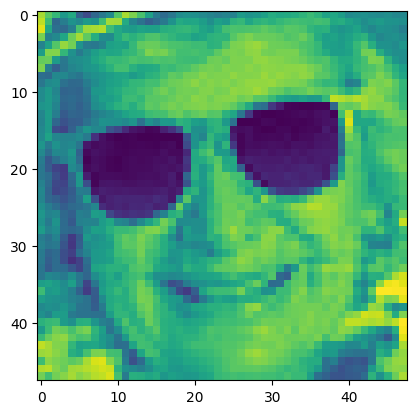

In [743]:
imshow(image)

In [744]:
pd.DataFrame(image)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,222,191,171,137,155,80,58,85,103,122,...,152,142,122,126,128,124,122,126,118,118
1,231,175,87,108,130,121,139,131,176,220,...,155,159,147,137,125,134,140,131,130,126
2,244,152,94,88,110,182,218,222,226,175,...,140,132,139,148,130,118,130,127,123,110
3,203,111,120,151,198,221,192,160,125,122,...,148,139,146,158,165,136,118,126,129,122
4,114,146,187,215,201,132,106,102,114,145,...,144,140,150,171,187,160,130,129,123,134
5,142,207,208,169,129,104,125,143,155,150,...,143,143,147,168,200,201,159,134,126,127
6,195,197,140,102,123,126,132,149,160,173,...,169,156,157,167,180,205,203,165,135,126
7,205,110,79,100,116,123,133,138,150,163,...,173,161,150,171,180,185,195,181,161,144
8,92,88,119,119,107,99,120,129,134,142,...,177,159,140,159,186,190,205,192,168,151
9,101,122,126,95,87,88,107,124,135,145,...,170,152,108,116,175,205,202,207,191,169


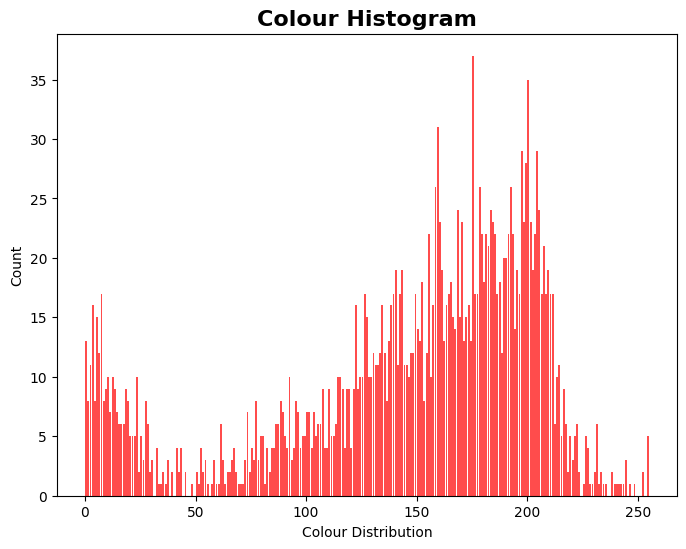

In [745]:
def color_histogram(image):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(image.ravel(), bins=255, color='red', alpha=0.7, rwidth=0.85)
    ax.set_title('Colour Histogram', fontweight='bold', fontsize=16)
    ax.set_xlabel('Colour Distribution')
    ax.set_ylabel('Count')
    return None

color_histogram(image)

In [746]:
def first_order(image):
    mean = np.mean(image)
    variance = np.var(image)
    skewness = skew(np.reshape(image, (48 * 48)))
    kurtos = kurtosis(np.reshape(image, (48 * 48)))
    entrop = entropy(np.reshape(image, (48 * 48)))
    return mean, variance, skewness, kurtos, entrop

pd.DataFrame(first_order(image), index=['Mean', 'Variance', 'Skewness', 'Kurtosis', 'Entropy'], columns=['Value'])


,Value
Mean,144.209201
Variance,3709.563874
Skewness,-0.973093
Kurtosis,0.056158
Entropy,7.619585


In [747]:
def compute_glcm(image, angles):
    glcm = graycomatrix(image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
    return glcm

In [748]:
def glcm_matrix(image, metric_texture):
    matrix = []
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    for i in metric_texture:
        row = []
        for j in angles:
            row.append(graycoprops(compute_glcm(image, [j]), prop=i)[0][0])
        matrix.append(row)
    return matrix

metric_texture = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
glcm_matrix = glcm_matrix(image, metric_texture)
pd.DataFrame(glcm_matrix, index=['Dissimilarity', 'Correlation', 'Homogeneity', 'Contrast', 'ASM', 'Energy'], columns=[0, 45, 90, 135])

,0,45,90,135
Dissimilarity,16.227394,22.849253,17.742021,21.691263
Correlation,0.911828,0.830199,0.891451,0.849750
Homogeneity,0.097907,0.077970,0.090976,0.075873
Contrast,658.515514,1283.285650,814.473404,1134.954278
ASM,0.000392,0.000352,0.000371,0.000358
Energy,0.019799,0.018761,0.019270,0.018913


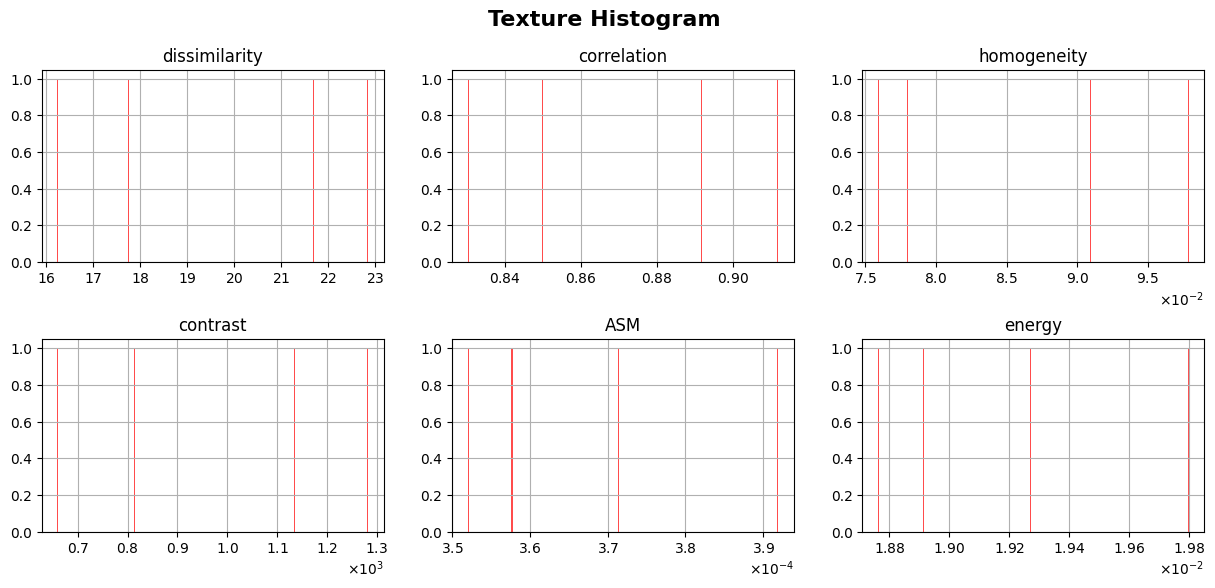

In [749]:
def texture_histogram(glcm_matrix, metric_texture):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.4)
    fig.suptitle('Texture Histogram', fontweight='bold', fontsize=16)
    ax = ax.ravel()
    for i, a in enumerate(ax):
        a.hist(glcm_matrix[i], bins=255, color='red', alpha=0.7, rwidth=0.85)
        a.set_title(metric_texture[i])
        a.grid()
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 3))
        a.xaxis.set_major_formatter(formatter)
    return None

texture_histogram(glcm_matrix, metric_texture)